# File to do Porto Taxi Trajectory Similiarity

### Step 1

Open the code/global_variables.py file, [or just click here](global_variables.py). And edit the values to fit the given experiment, the name of the chosen subset ("subset-*size*) and the size of the subset. As well as the coordinates of the geographical area.


### Step 2

Make sure you have the needed files/folders for the chosen subset.
 - in data/raw_data there must be a .csv file with the subset of the chosen size. If not, it must be uploaded.
 - in data/raw_data there must be a .csv file with the busroutes to be used. If not, this must be uploaded.

 - in data/chosen_data there must be a folder with the same name as global_variables.CHOSEN_SUBSET_NAME. If not, create this empty folder.
 - in data/hashed_data there must be a folder with the same name as global_variables.CHOSEN_SUBSET_NAME. If not, create this empty folder.
 - in data there must be a folder called bus_data. If not, create this empty folder.
 - in code/experiments/results there must be a folder with the same name as global_variables.CHOSEN_SUBSET_NAME. If not create this folder.
        - Inside this folder there must be a folder called lists, and a folder named plots. If not, create these empty folders.

### Step 3

Run the cells in [code/porto-data.ipynb](porto-data.ipynb), or just run the cell below.
This will load the data from the chosen subset into the folder data/chosen_data/subset-'size', each row in the dataset is written in its own text file. It also creates a META-file which contains the name of all the text files in the subset.

(Might requires to install nbformat: "pip install nbformat")

In [1]:
%run "porto-data.ipynb"

Check the folder: data/chosen_data/subset-100. Files should have been generated.


### Step 4

Run the cells in [code/bus-data.ipynb](bus-data.ipynb), or just run the cell below. This will load the bus data into the folder data/bus_data, each bus-route is written in its own file. It also creted a META-file which containt the name of all the text files in the subset.

In [2]:
%run "bus-data.ipynb"

Check the folder: data/bus_data/. Files should have been generated.


### Step 5

Run the cells in [code/lsh-grid.ipynb](lsh-grid.ipynb), or just run the cell below. This will represent each of the rows/trajectories as an hash, and create a text file for each hashed trajectory in the folder data/hashed_data/subset-'size', as well as a META file.

In [3]:
%run "lsh-grid.ipynb"

Check the folder: data/hashed_data/subset-100. Hash-files should have been generated.


### Step 6
Run the cells in [code/similarities-only-grid.ipynb](similarities-only-grid.ipynb), or just run the cell below. This will calculate similarities between the hashed trajectories, and create a file in code/experiments/similarities/ with the results

In [4]:
%run "similarities-only-grid.ipynb"

Check ../code/experiments/similarities/, it should be a file here named grid_porto-subset-100.csv which contains the similarities in the dataset.


### Step 7

Run the code below to see the clusters created.

/cluster/home/andrehva/.conda/envs/masteroppgave/lib/python3.12/site-packages/scipy/cluster/hierarchy.py:796: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')
/cluster/home/andrehva/.conda/envs/masteroppgave/lib/python3.12/site-packages/scipy/cluster/hierarchy.py:796: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')
/cluster/home/andrehva/.conda/envs/masteroppgave/lib/python3.12/site-packages/scipy/cluster/hierarchy.py:796: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')
/cluster/home/andrehva/.conda/envs/masteroppgave/lib/python3.12/site-packages/scipy/cluster/hierarchy.py:796: ClusterWarning: The sym

Best number of clusters is: 24


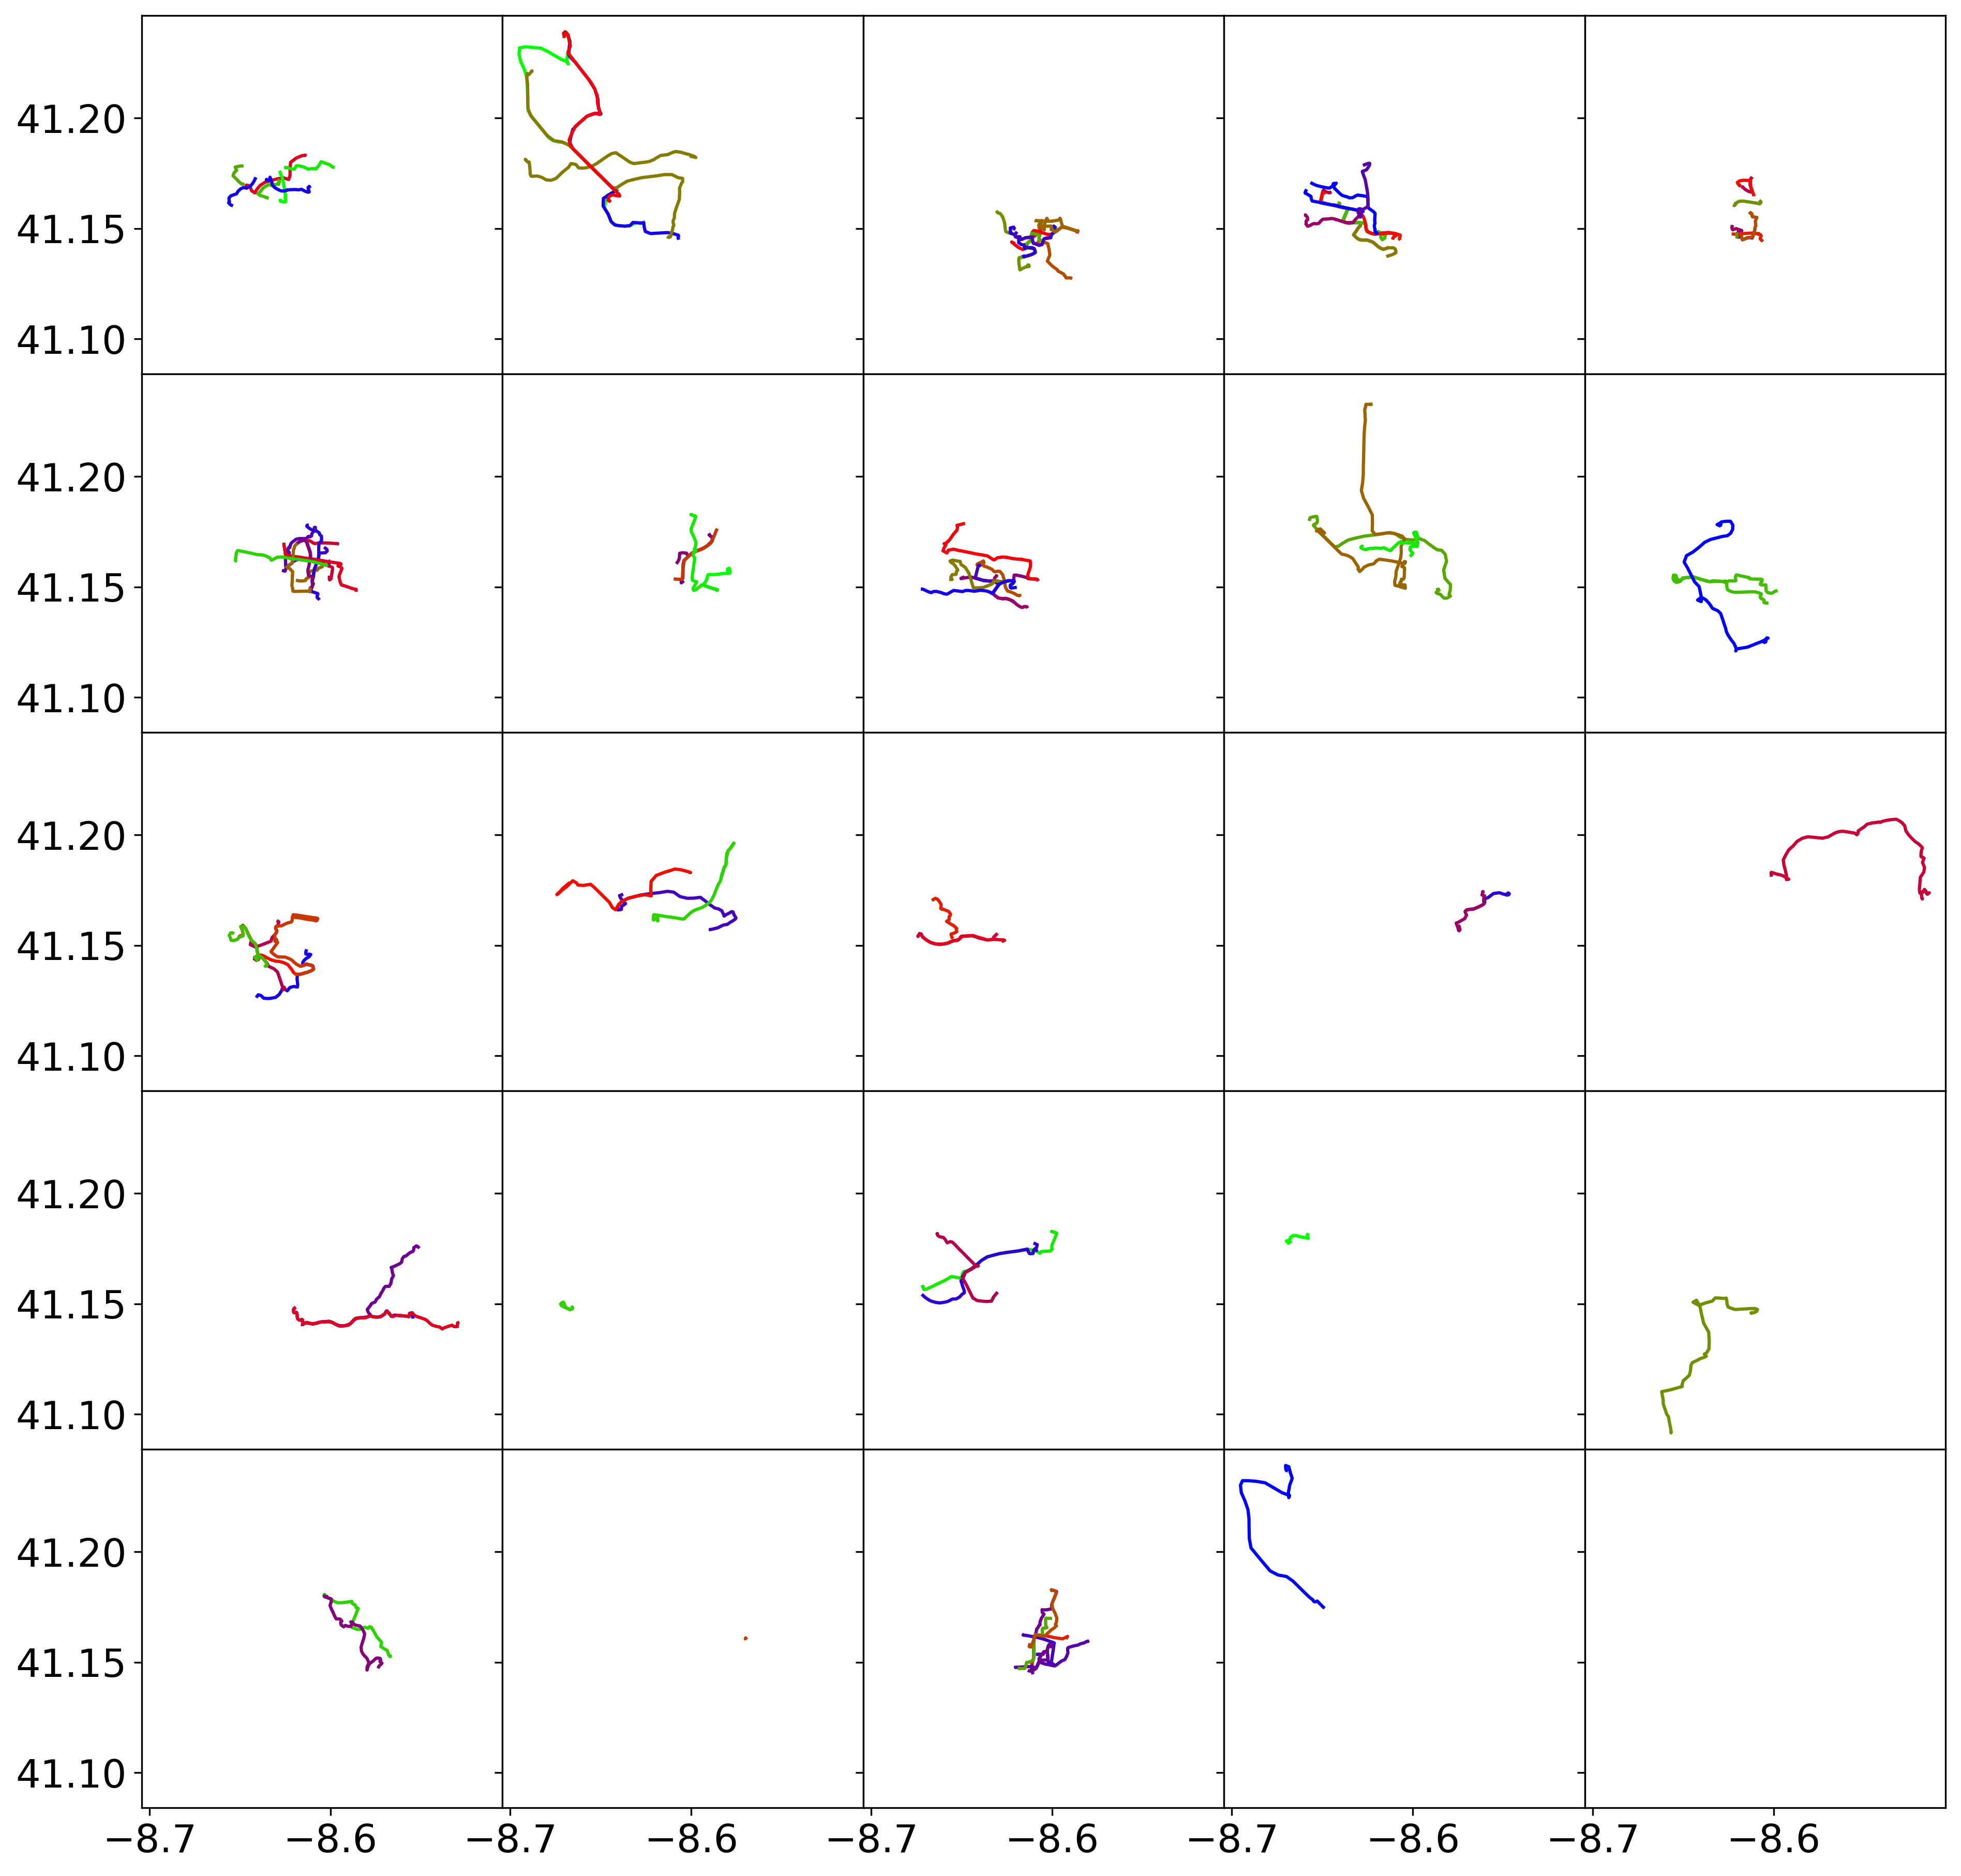

Here is the dictionary with the clusters:
{0: ['1375861664620000192', '1380851761620000005', '1386997689620000342', '1387291749620000167', '1389341371620000625', '1389793211620000067', '1396680554620000424'], 1: ['1382072654620000320', '1382272470620000359', '1386611433620000173', '1393655571620000388', '1399218051620000403'], 2: ['1376144202620000327', '1382306252620000520', '1386067613620000001', '1386708596620000603', '1392383741620000548', '1393279569620000624', '1402461954620000233', '1403795554620000235', '1403868943620000068'], 3: ['1374297325620000286', '1376931941620000495', '1377124184620000254', '1379621202620000344', '1380150223620000600', '1383639409620000263', '1384862565620000557', '1389395125620000201', '1396454138620000138', '1397144058620000114'], 4: ['1374154470620000068', '1379770589620000116', '1385560486620000137', '1386002893620000562', '1392026013620000560', '1392752466620000154', '1394217504620000066'], 5: ['1373386574620000676', '1373473334620000242', '1379193

In [5]:
from math import ceil
from experiments.hierarchical_clustering import HCA
from experiments.davies_bouldin import davies_bouldin

import global_variables

best_db_value = 100
BestGrid = None
#TODO: update range
highest_number_of_clusters = ceil(global_variables.CHOSEN_SUBSET_SIZE / global_variables.THRESHOLD_NUMBER_OF_TRAJECTORIES)
for i in range (5,highest_number_of_clusters):
    PortoGrid = HCA("Porto", f"../code/experiments/similarities/grid_porto-{global_variables.CHOSEN_SUBSET_NAME}.csv", i )
    result, _, _ = davies_bouldin(PortoGrid.distances, PortoGrid.clusters)
    if result<best_db_value:
        best_db_value = result
        BestGrid = PortoGrid

print("Best number of clusters is: " + str(BestGrid.n_clusters))
BestGrid.plot_clusters("Porto - Grid")
clusters_dict = BestGrid.get_cluster_dictionary()
print("Here is the dictionary with the clusters:")
print(clusters_dict)

### Step 8
Run the cell below to run the Frechet algorithm(with a twist). It uses the clusters already created from LSH, and checks the trajectories within the same cluster for "real" similarity to find the well used taxi routes. Then the well used taxi routes is compared to the bus routes, to check for similarity.

In [6]:
from experiments.frechet_for_taxi_case import do_whole_experiment

do_whole_experiment(clusters_dict, raw_df, raw_df_bus)

It was found 24 well used taxi routes.
0 of the well used routes did not match any bus routes.
While it was found 14 matches between well-used taxi routes and bus routes.
The results are written to file in the folder: code/experiments/results/subset-100/lists


### (Step 9)
Run the cells in [code/results-visualisation.ipynb](results-visualisation.ipynb), or just run the cell below. This will create visualisation of the results, and save them to the folder "code/experiments/results/subset-'size'/plots" as html pages, which can be opened in a web browser.

In [7]:
#%run "results-visualisation.ipynb"

### (Step 10)
If you want to see the visualisations of the results in this notebook, run the cell below. Update the name of the result you want to see, check folder code/experiments/results/subset-'size'/lists to see all results which can be plotted.

In [8]:
# Update this parameter depending on which result you want to view.
# All files in folder code/experiments/results/subset-'size'/lists can be chosen. Eg. match-0.csv, not-match-0-csv.
#name_of_file = "match-0.csv"

#plot = plot_result(f"experiments/results/{global_variables.CHOSEN_SUBSET_NAME}/lists/{name_of_file}")
#plot